In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.regularizers import l2

In [ ]:
df_train = pd.read_csv('preprocessed.csv')

In [ ]:
X = df_train[['Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Pclass_1', 'Pclass_2', 'Pclass_3']]
y = df_train['Survived']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
l2_penalty = 0.3

model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(l2_penalty)))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(l2_penalty)))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(l2_penalty)))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                416       
                                                                 
 batch_normalization (Batch  (None, 32)                128       
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 batch_normalization_1 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dropout (Dropout)           (None, 128)               0

In [ ]:
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)

Epoch 1/50
12/12 [==============================] - 9s 68ms/step - loss: 41.8969 - accuracy: 0.6938 - val_loss: 37.8958 - val_accuracy: 0.6592
Epoch 2/50
12/12 [==============================] - 0s 24ms/step - loss: 35.1139 - accuracy: 0.7795 - val_loss: 31.7359 - val_accuracy: 0.7374
Epoch 3/50
12/12 [==============================] - 0s 18ms/step - loss: 29.3423 - accuracy: 0.7978 - val_loss: 26.5096 - val_accuracy: 0.7542
Epoch 4/50
12/12 [==============================] - 0s 17ms/step - loss: 24.4719 - accuracy: 0.8118 - val_loss: 22.1256 - val_accuracy: 0.7709
Epoch 5/50
12/12 [==============================] - 0s 20ms/step - loss: 20.4084 - accuracy: 0.8076 - val_loss: 18.4655 - val_accuracy: 0.7933
Epoch 6/50
12/12 [==============================] - 0s 12ms/step - loss: 17.0163 - accuracy: 0.8174 - val_loss: 15.4193 - val_accuracy: 0.7989
Epoch 7/50
12/12 [==============================] - 0s 17ms/step - loss: 14.1960 - accuracy: 0.8230 - val_loss: 12.8905 - val_accuracy: 0.8045

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

6/6 [==============================] - 0s 5ms/step - loss: 0.5362 - accuracy: 0.7933
Test Loss: 0.5361560583114624, Test Accuracy: 0.7932960987091064


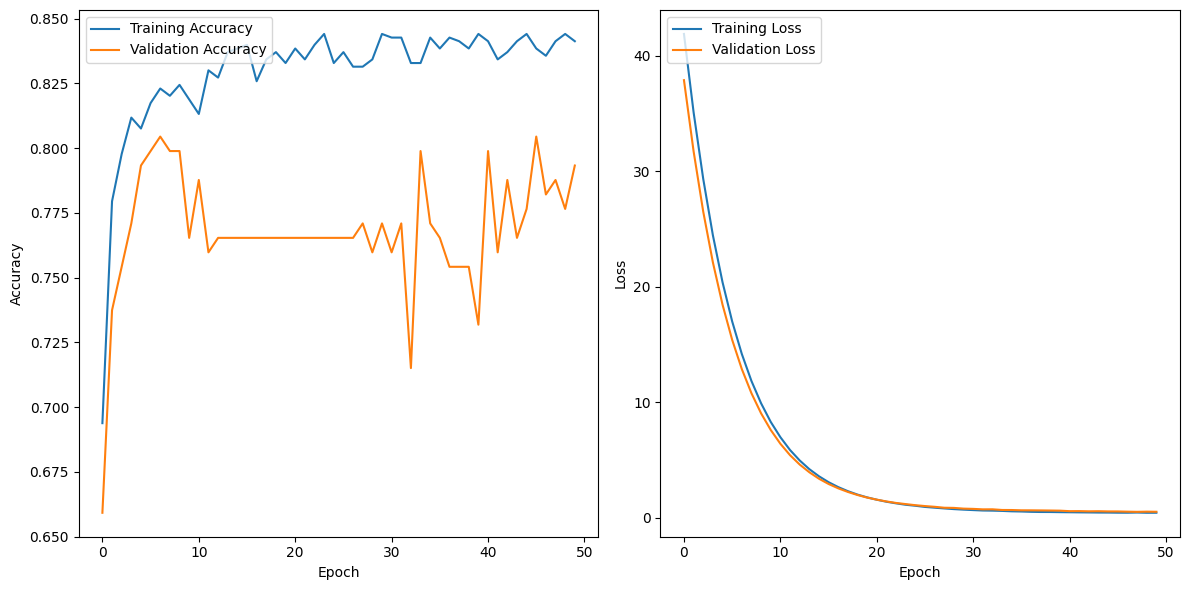

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


6/6 [==============================] - 0s 3ms/step


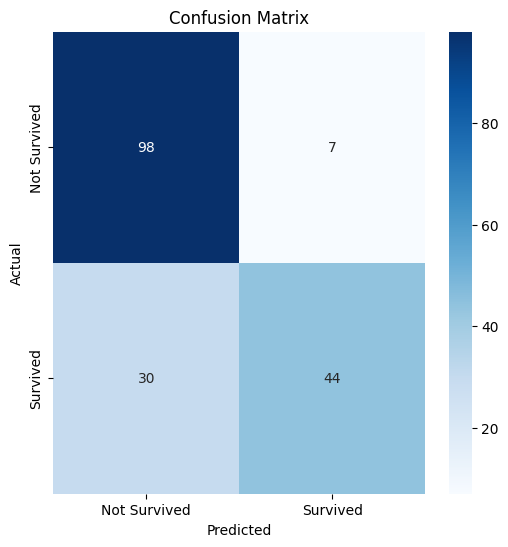

In [ ]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Not Survived", "Survived"],
            yticklabels=["Not Survived", "Survived"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
input_data = {
    'Age': [25],
    'SibSp': [1],
    'Parch': [0],
    'Fare': [20],
    'Sex_female': [1],
    'Sex_male': [0],
    'Embarked_C': [1],
    'Embarked_Q': [0],
    'Embarked_S': [1],
    'Pclass_1': [1],
    'Pclass_2': [0],
    'Pclass_3': [0]
}

input_df = pd.DataFrame(input_data)

prediction = model.predict(input_df)

print("Predicted Survival Status:", prediction[0])

1/1 [==============================] - 0s 20ms/step
Predicted Survival Status: [[0.99999255]]
